# Simulations


Keep in mind that for now we model a "canonical order" as a order of shifts, e.g. if biomarker $i$ has shift $5$ and biomarker $j$ has shift $10$, then in "canonical order" $i$ preceeds $j$. However, given different (possibly randomly generated values of shifts and slopes), some biomarker might have smaller shift, but degrade much faster after 50% threshold.

See example below, biomarker 2 starts degradion later than biomarker 1, but much faster.

In [35]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def sigmoid_inv(x, s=0, c=1):
    return 1 / (1 + np.exp(-(x-s)/c))

In [36]:
random_state = 10

## Generate biomarker parameters

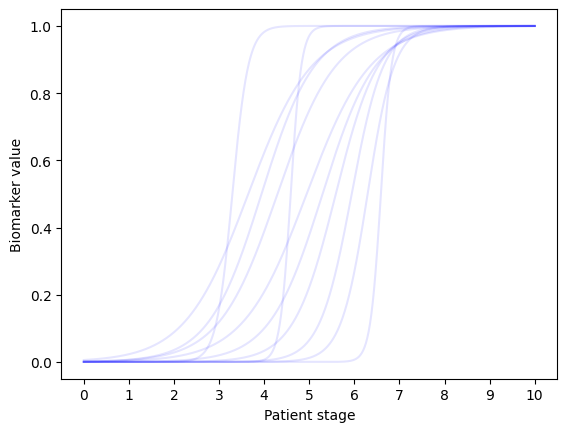

In [37]:
random = np.random.RandomState(10) # fix RS for reproducibility

shift = random.randint(5, 7, 11) # shifts are from 5 to 7, we generate 11 biomarkers
shift = np.cumsum(shift)
vel = random.randint(2, 15, 11) # degradation slope (velocity) is from 2 to 15, again 11 parameters

x = np.linspace(-50, 120, 1000) # Rather arbitrary mapping from x to stage (uniform), works for now
for s, v in zip(shift, vel):
    yy = sigmoid_inv(x, s, v)
    plt.plot(x, yy, alpha=0.1, c='b')

plt.xticks(ticks=np.arange(-50,121,17), labels=np.arange(11));

stage2x_dict = dict(zip(np.arange(11),np.arange(-50,121,17)))
biomarkers_params = {}
for i, (s, v) in enumerate(zip(shift, vel)):
    biomarkers_params[i]={'s':s, 'c':v}
    
plt.xlabel('Patient stage')
plt.ylabel('Biomarker value');

In [38]:
biomarkers_params

{0: {'s': 6, 'c': 3},
 1: {'s': 12, 'c': 12},
 2: {'s': 17, 'c': 10},
 3: {'s': 23, 'c': 11},
 4: {'s': 28, 'c': 2},
 5: {'s': 34, 'c': 12},
 6: {'s': 40, 'c': 10},
 7: {'s': 45, 'c': 8},
 8: {'s': 51, 'c': 6},
 9: {'s': 57, 'c': 5},
 10: {'s': 62, 'c': 2}}

## Generate patient distribution (by stage)

How many patients will be at stage $x$

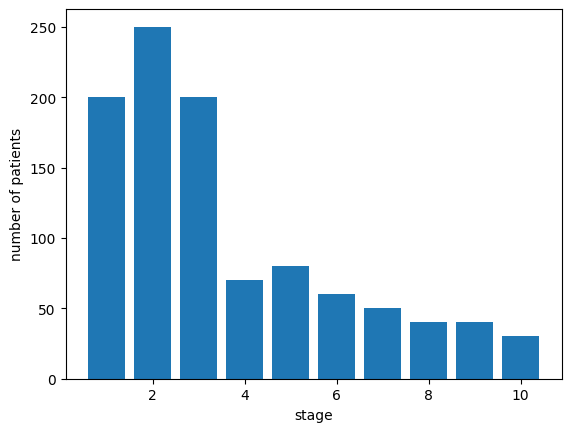

In [39]:
n_patients_stage = {
    1: 200,
    2: 250,
    3: 200,
    4: 70,
    5: 80,
    6: 60,
    7: 50,
    8: 40,
    9: 40,
    10: 30,
}

plt.bar(n_patients_stage.keys(), n_patients_stage.values());
plt.xlabel('stage')
plt.ylabel('number of patients');

## Generate biomarkers

In [40]:
def generate_patient(stage, biomarkers: dict, random_state=None, noise=True):
    random = np.random.RandomState(random_state)
    x = []
    for marker, parameters in biomarkers.items():
        value = sigmoid_inv(stage, parameters['s'], parameters['c'])
        if noise:
            value += random.normal(0, 0.1)
        value = np.clip(value, 0, 1)
        x.append(value)
    return np.array(x)

In [41]:
X = []
rs = 0
for stage, total_number in n_patients_stage.items():
    for _ in range(total_number):
        x = generate_patient(stage2x_dict[stage], biomarkers_params, noise=True, random_state=rs)
        X.append(x)
        rs+=1
        
X = np.array(X)

# Let's say stages 1,2,3 are normal, and stages > 3 are abnormal
n_healthy = n_patients_stage[1]+n_patients_stage[2]+n_patients_stage[3]
n_diseased = sum(n_patients_stage.values()) - n_healthy

y = np.array([0]*n_healthy+[1]*n_diseased)

In [42]:
X.shape, y.shape

((1020, 11), (1020,))

In [43]:
stages = []

for k,v in n_patients_stage.items():
    stages.extend([k]*v)
stages = np.array(stages)

In [44]:
stages

array([ 1,  1,  1, ..., 10, 10, 10])

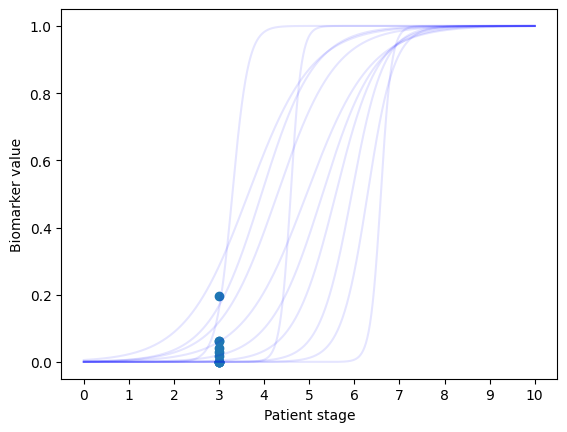

In [45]:
x = np.linspace(-50, 120, 1000) # Rather arbitrary mapping from x to stage (uniform), works for now
for s, v in zip(shift, vel):
    yy = sigmoid_inv(x, s, v)
    plt.plot(x, yy, alpha=0.1, c='b')

plt.xticks(ticks=np.arange(-50,121,17), labels=np.arange(11));

stage2x_dict = dict(zip(np.arange(11),np.arange(-50,121,17)))
biomarkers = {}
for i, (s, v) in enumerate(zip(shift, vel)):
    biomarkers[i]={'s':s, 'c':v}
    
# Plot couple of example patients on biomarkers' trajectory

plt.scatter([stages[150]]*11, X[150], )
    
plt.xlabel('Patient stage')
plt.ylabel('Biomarker value');

In [46]:
stages[150]

1

 Recall how even though stage is 1, on OX axis it apears as 3, this is due to shift for biomarker 0 being 6, see biomarkers_params dict, one could imporve this alignment, by generating sigmoids parameters in some systematic  non random way

In [47]:
biomarkers_params

{0: {'s': 6, 'c': 3},
 1: {'s': 12, 'c': 12},
 2: {'s': 17, 'c': 10},
 3: {'s': 23, 'c': 11},
 4: {'s': 28, 'c': 2},
 5: {'s': 34, 'c': 12},
 6: {'s': 40, 'c': 10},
 7: {'s': 45, 'c': 8},
 8: {'s': 51, 'c': 6},
 9: {'s': 57, 'c': 5},
 10: {'s': 62, 'c': 2}}

## Check biomarker's distribution

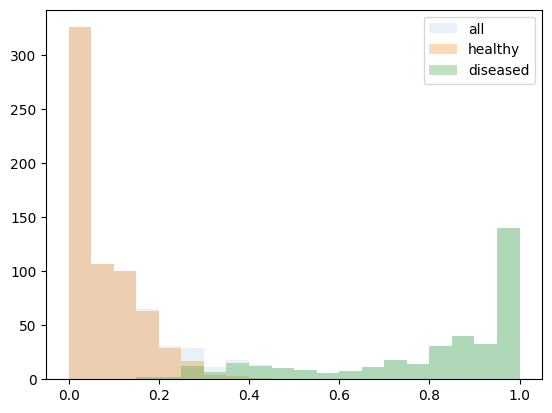

In [48]:
biomarker = 3

bins = plt.hist(X[:, biomarker], alpha=0.1, label='all', bins=20);
plt.hist(X[:n_healthy, biomarker], label='healthy', bins=bins[1], alpha=0.3);
plt.hist(X[n_healthy:, biomarker], label='diseased', bins=bins[1], alpha=0.3);
plt.legend();

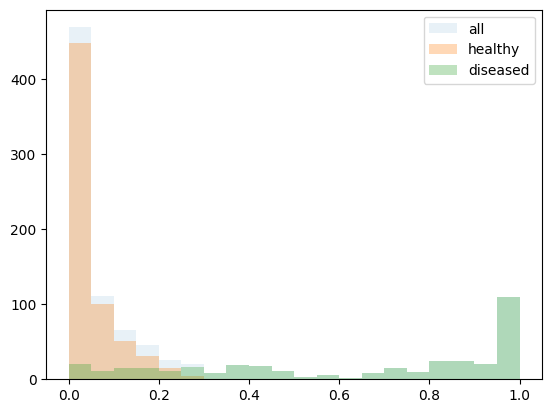

In [49]:
biomarker = 6

bins = plt.hist(X[:, biomarker], alpha=0.1, label='all', bins=20);
plt.hist(X[:n_healthy, biomarker], label='healthy', bins=bins[1], alpha=0.3);
plt.hist(X[n_healthy:, biomarker], label='diseased', bins=bins[1], alpha=0.3);
plt.legend();

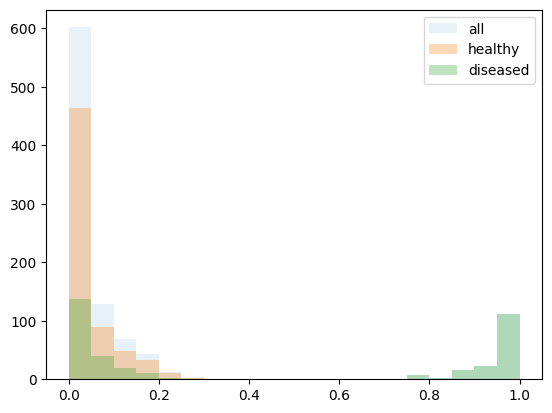

In [50]:
biomarker = 10

bins = plt.hist(X[:, biomarker], alpha=0.1, label='all', bins=20);
plt.hist(X[:n_healthy, biomarker], label='healthy', bins=bins[1], alpha=0.3);
plt.hist(X[n_healthy:, biomarker], label='diseased', bins=bins[1], alpha=0.3);
plt.legend();

In [51]:
X.shape

(1020, 11)

In [52]:
len(y)

1020

## Distribution of a noisy biomarker

stage 5, biomarker 7

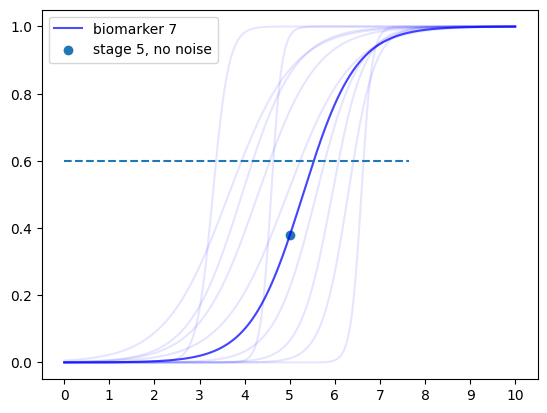

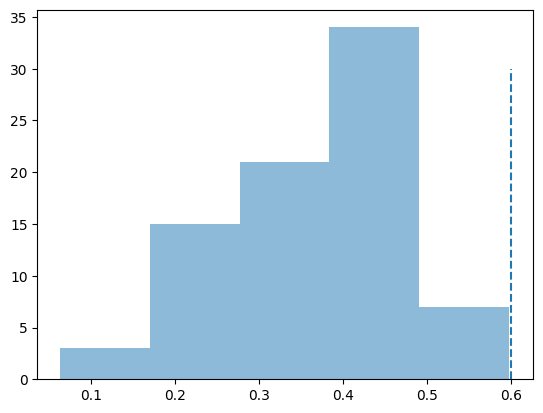

In [53]:
random = np.random.RandomState(10)

shift = random.randint(5, 7, 11)
shift = np.cumsum(shift)
vel = random.randint(2, 15, 11)

x = np.linspace(-50, 120, 1000)
for s, v in zip(shift, vel):
    yy = sigmoid_inv(x, s, v)
    plt.plot(x, yy, alpha=0.1, c='b')
    
yy = sigmoid_inv(x, shift[6], vel[6], )
plt.plot(x, yy, alpha=0.7, c='b', label='biomarker 7')
plt.scatter(x[500], yy[500], label='stage 5, no noise') # x[500]~=35~=stage 5
plt.xticks(ticks=np.arange(-50,121,17), labels=np.arange(11));
plt.hlines(0.6, -50, 80, ls='--')
plt.legend();


plt.figure()
plt.hist(X[720:800, 6], 5, alpha=0.5) # stage 5
plt.vlines(0.6, 0, 30, ls='--');

## EBM fit

install https://github.com/kurmukovai/ebm-progression by cloning the repo and `pip install -e .`

In [54]:
import os
import sys

parent_dir = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
sys.path.append(parent_dir)

from simulation_class.ebm.probability import log_distributions, fit_distributions
from simulation_class.ebm.probability_legacy import log_distributions_old # unmodified from anvar's code
from simulation_class.ebm.mcmc import greedy_ascent, mcmc
from simulation_class.ebm.likelihood import EventProbabilities


In [55]:
log_p_e, log_p_not_e = log_distributions(X, y, point_proba=False)
log_p_e_old, log_p_not_e_old = log_distributions_old(X, y, point_proba=False)

In [56]:
print("NEW VER")
print(log_p_e)
print(np.max(log_p_e))
print("OLDER VER")
print(log_p_e_old)
print(np.max(log_p_e_old))

print(np.max(log_p_e - log_p_e_old))

NEW VER
[[-1.71690135e+01 -1.79752832e+01 -1.81363412e+01 ... -1.84206807e+01
  -3.19272414e+00 -4.24022454e+00]
 [-1.71690135e+01 -1.79752832e+01 -1.81363412e+01 ... -3.44500066e+00
  -1.84206807e+01 -1.92270591e+00]
 [-1.71690135e+01 -1.79752832e+01 -1.81363412e+01 ... -1.84206807e+01
  -1.84206807e+01 -2.89778186e+00]
 ...
 [-3.49616729e-08 -5.73502445e-02 -1.32888403e-08 ... -9.88825456e-02
  -1.00000001e-08 -1.00000001e-08]
 [-4.81768494e-02 -1.56111071e-08 -2.14909726e-04 ... -1.00000001e-08
  -1.00000001e-08 -2.02460250e-01]
 [-3.05867503e-01 -5.59179520e-02 -8.95049748e-02 ... -1.00000001e-08
  -1.00000001e-08 -1.00000001e-08]]
-1.0000000100247594e-08
OLDER VER
[[-1.58267799e+01 -5.81589717e-01 -1.60675586e+01 ... -2.86730472e-07
  -1.52191730e+01 -4.77325773e-01]
 [-1.58267799e+01 -7.00062525e-08 -1.05183593e-07 ... -2.46282447e+00
  -2.45695498e-07 -1.51491998e+01]
 [-1.33818717e-07 -1.29500277e-01 -1.05183593e-07 ... -2.86730472e-07
  -2.45695498e-07 -1.51491998e+01]
 ...
 [

In [57]:
starting_order = np.arange(11)
starting_order_copy = starting_order
# just to make optimization procedure do the job, since data where generated with canonical order 0..10
np.random.shuffle(starting_order) 
order, loglike, update_iters = greedy_ascent(log_p_e, log_p_not_e, 
                                             n_iter=10_000, order = starting_order_copy,
                                             random_state=2020)

100%|██████████| 10000/10000 [00:03<00:00, 3197.10it/s]


In [58]:
starting_order_copy = starting_order
# just to make optimization procedure do the job, since data where generated with canonical order 0..10
np.random.shuffle(starting_order) 
order_old, loglike_old, update_iters_old = greedy_ascent(log_p_e_old, log_p_not_e_old, 
                                             n_iter=10_000, order = starting_order_copy,
                                             random_state=2020)

100%|██████████| 10000/10000 [00:03<00:00, 3228.37it/s]


In [59]:
print(order)
print(order_old)

[10  8  0  2  1  5  6  3  9  4  7]
[10  8  0  2  1  5  6  3  9  4  7]


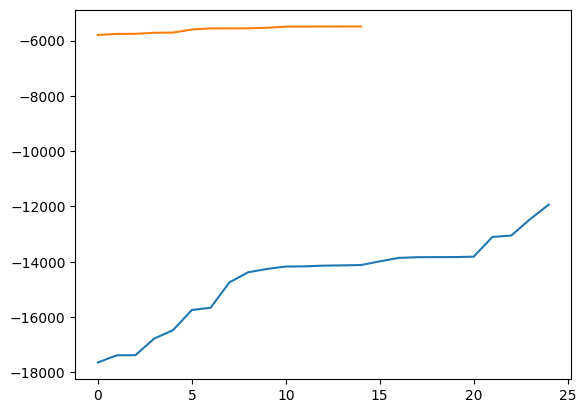

In [60]:
plt.plot(loglike)
plt.plot(loglike_old)

In [61]:
orders, loglike, update_iters, probas = mcmc(log_p_e, log_p_not_e,
                                                 order=order, n_iter=500_000,
                                                 random_state=2020)

  0%|          | 0/500000 [00:00<?, ?it/s]/home/dsemchin/Progression_models_simulations/simulation_class/ebm/mcmc.py:58: RuntimeWarning: overflow encountered in exp
  p = np.exp(new_loglike - old_loglike)
100%|██████████| 500000/500000 [02:37<00:00, 3171.36it/s]


In [62]:
orders_old, loglike_old, update_iters_old, probas_old = mcmc(log_p_e_old, log_p_not_e_old,
                                                 order=order_old, n_iter=500_000,
                                                 random_state=2020)

  0%|          | 324/500000 [00:00<02:34, 3237.65it/s]

100%|██████████| 500000/500000 [02:29<00:00, 3334.13it/s]


In [63]:
orders[:10]

[array([10,  4,  0,  2,  1,  5,  6,  3,  9,  8,  7]),
 array([10,  4,  0,  2,  1,  5,  6,  3,  7,  8,  9]),
 array([10,  4,  2,  0,  1,  5,  6,  3,  7,  8,  9]),
 array([ 6,  4,  2,  0,  1,  5, 10,  3,  7,  8,  9]),
 array([ 6,  5,  2,  0,  1,  4, 10,  3,  7,  8,  9]),
 array([ 5,  6,  2,  0,  1,  4, 10,  3,  7,  8,  9]),
 array([ 3,  6,  2,  0,  1,  4, 10,  5,  7,  8,  9]),
 array([ 3,  6,  2,  0,  1,  5, 10,  4,  7,  8,  9]),
 array([ 3,  5,  2,  0,  1,  6, 10,  4,  7,  8,  9]),
 array([ 5,  3,  2,  0,  1,  6, 10,  4,  7,  8,  9])]

In [64]:
orders_old[:10]

[array([ 5,  2,  3,  0,  1,  8,  4,  7,  6,  9, 10]),
 array([ 5,  2,  0,  3,  1,  8,  4,  7,  6,  9, 10]),
 array([ 4,  2,  0,  3,  1,  8,  5,  7,  6,  9, 10]),
 array([ 4,  8,  0,  3,  1,  2,  5,  7,  6,  9, 10]),
 array([ 4,  8,  0,  3,  1,  2,  5,  6,  7,  9, 10]),
 array([ 8,  4,  0,  3,  1,  2,  5,  6,  7,  9, 10]),
 array([ 8,  2,  0,  3,  1,  4,  5,  6,  7,  9, 10]),
 array([ 8,  0,  2,  3,  1,  4,  5,  6,  7,  9, 10]),
 array([ 8,  0,  2,  5,  1,  4,  3,  6,  7,  9, 10]),
 array([ 8,  0,  2,  5,  1,  3,  4,  6,  7,  9, 10])]

## Optimal order

For relatively small number of biomarkers, one could find an optimal order given the data (by computing all possible permutations). For 11 biomarkers, there are 11! = $39916800$ possible orders, so my implementation computing the total likelihood from Fontejn et. al takes about an 1 hour. One could optimize, I believe optimal order (under EBM setting) could be computationally tractable for ~15 biomarkers (in under a 1 day of computing+we could compute likelihoods in parallel, may be pushing to 16-17 biomarkers).

In [30]:
from tqdm import tqdm

In [31]:
model = EventProbabilities(log_p_e, log_p_not_e)
loglike = model.compute_total_likelihood(order)

In [32]:
import itertools
all_orders = list(itertools.permutations(np.arange(11)))

In [33]:
loglikes = []
for o in tqdm(all_orders):
    loglike = model.compute_total_likelihood(o)
    loglikes.append(loglike)

 73%|███████▎  | 29045888/39916800 [47:46<17:52, 10131.58it/s] IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

100%|██████████| 39916800/39916800 [1:05:40<00:00, 10131.07it/s]


In [34]:
np.argmax(loglike)

0

In [44]:
all_orders[np.argmax(loglike)]

11

In [42]:
for i,o in enumerate(all_orders):
    if o == (1,  0,  2,  3,  5,  6,  4,  7,  8,  9, 10):
        print(i)
        break

3629640


In [46]:
loglikes[3629640]

-11503.689774515527

In [47]:
loglikes[0]

-11722.129063344328

In [48]:
np.min(loglikes)

-21739.725601820035

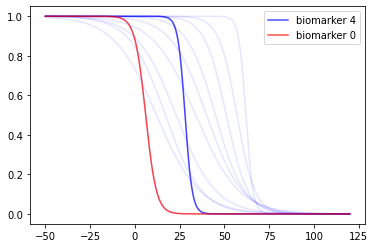

In [54]:
random = np.random.RandomState(10)

shift = random.randint(5, 7, 11)
shift = np.cumsum(shift)
vel = random.randint(2, 15, 11)

x = np.linspace(-50, 120, 1000)
for s, v in zip(shift, vel):
    yy = sigmoid_inv(x, s, v)
    plt.plot(x, yy, alpha=0.1, c='b')
    
yy = sigmoid_inv(x, shift[4], vel[4], )
plt.plot(x, yy, alpha=0.7, c='b', label='biomarker 4')
yy = sigmoid_inv(x, shift[0], vel[0], )

plt.plot(x, yy, alpha=0.7, c='r', label='biomarker 0')


plt.legend();

TODO: 

1. Добавить кластеры сабджектов
2. Придумать модель которая умеет такое фитить
3. Сделать принадлежность кластеру функцией от каких-то клинических переменных
 - MOCA
 - MMSE
 - UPDRS
 
 т.е условно скоры по MOCA определяет то в какой кластер деградации попадает пациент
 

одна группа маркеров которая генерит центры кластеров по клиническим переменным, потом в зависимости от кластера 
разные параметры сигмоид, 

модель для определения кластера может быть supervised 